# Will the person take a bank loan?
### Objective:
The classification goal is to predict the likelihood of a liability customer buying personal loans.

### Steps and tasks:

1. Read the column description and ensure you understand each attribute well
2. Study the data distribution in each attribute, share your findings
3. Get the target column distribution.
4. Split the data into training and test set in the ratio of 70:20 respectively
5. Use different classification models to predict the likelihood of a liability customer buying personal loans
6. Print the confusion matrix and ROC plots for all the above models

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# About file:
Attribute Information:

1. ID : Customer ID

2. Age : Customer's age in completed years

3. Experience : #years of professional experience

4. Income : Annual income of the customer in dollars

5. ZIP Code : Home Address ZIP code.

6. Family : Family size of the customer

7. CCAvg : Avg. spending on credit cards per month in dollars

8. Education : Education Level.
    1. Undergrad;
    2. Graduate;
    3. Advanced/Professional

9. Mortgage : Value of house mortgage if any, in dollars

10. Personal Loan : Did this customer accept the personal loan offered in the last campaign?

11. Securities Account : Does the customer have a securities account with the bank?

12. CD Account : Does the customer have a certificate of deposit (CD) account with the bank?

13. Online : Does the customer use internet banking facilities?

14. Credit card : Does the customer use a credit card issued by

In [2]:
file = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [3]:
file

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [4]:
file.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [473]:
file.skew()

Age                  -0.029341
Experience           -0.026325
Income                0.841339
Family                0.155221
CCAvg                 1.598443
Education             0.227093
Mortgage              2.104002
Personal Loan         2.743607
Securities Account    2.588268
CD Account            3.691714
Online               -0.394785
CreditCard            0.904589
dtype: float64

In [5]:
file = file.drop(['ZIP Code','ID'],axis=1)

In [6]:
file.describe(include = 'all')

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


# Data Analysis

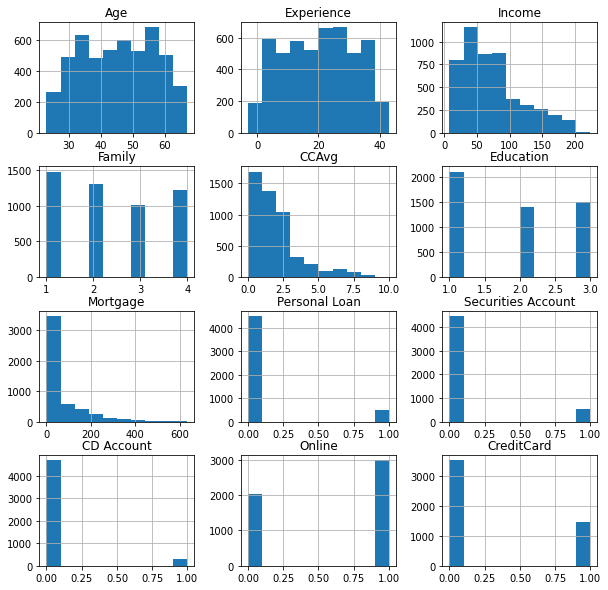

In [481]:
file.hist(figsize=(10,10));

<AxesSubplot:xlabel='Personal Loan', ylabel='Age'>

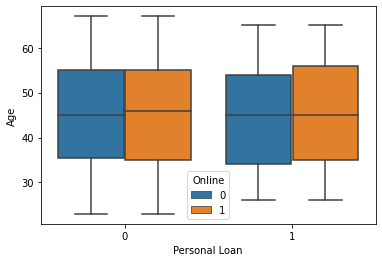

In [7]:
sns.boxplot(x = 'Personal Loan',y = 'Age',hue= 'Online',data = file)

<AxesSubplot:xlabel='Personal Loan', ylabel='Income'>

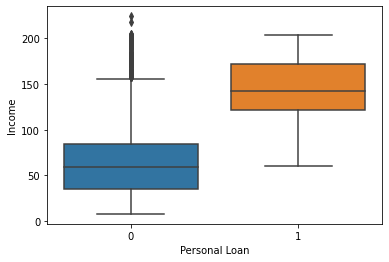

In [474]:
sns.boxplot(x = 'Personal Loan',y = 'Income',data = file)

<AxesSubplot:xlabel='Personal Loan', ylabel='CCAvg'>

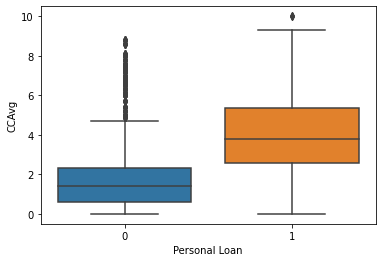

In [475]:
sns.boxplot(x = 'Personal Loan',y = 'CCAvg',data = file)

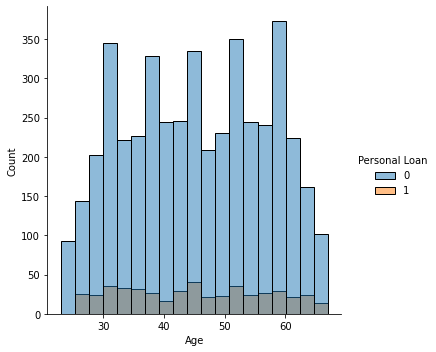

In [10]:
sns.displot(file,x = 'Age',hue = 'Personal Loan');

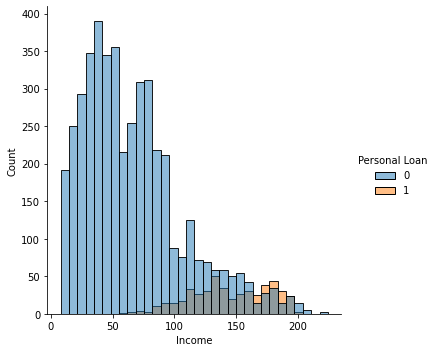

In [11]:
sns.displot(file,x = 'Income',hue = 'Personal Loan');

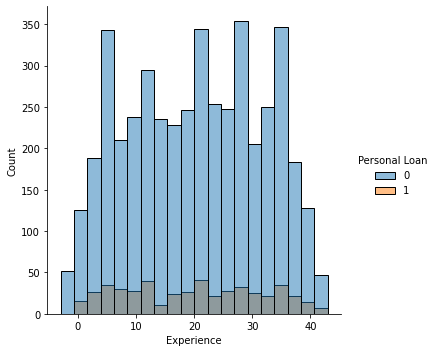

In [12]:
sns.displot(file,x = 'Experience',hue = 'Personal Loan');

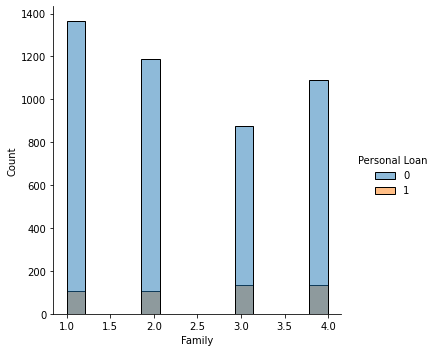

In [13]:
sns.displot(file,x = 'Family',hue = 'Personal Loan');

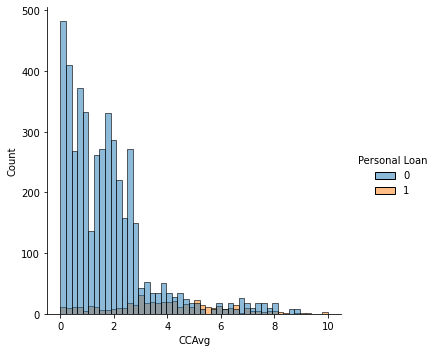

In [14]:
sns.displot(file,x = 'CCAvg',hue = 'Personal Loan');

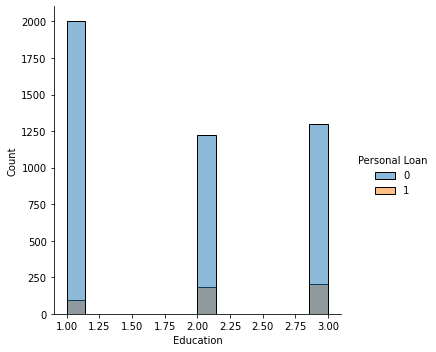

In [15]:
sns.displot(file,x = 'Education',hue = 'Personal Loan');

<AxesSubplot:xlabel='Education', ylabel='count'>

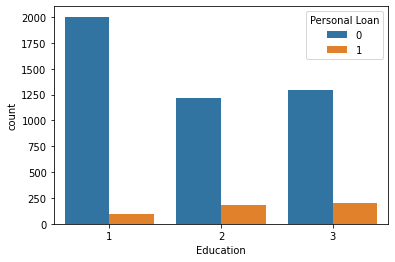

In [16]:
sns.countplot(data=file,x = 'Education',hue = 'Personal Loan')

## Pairwise plot for people who took Personal Loan

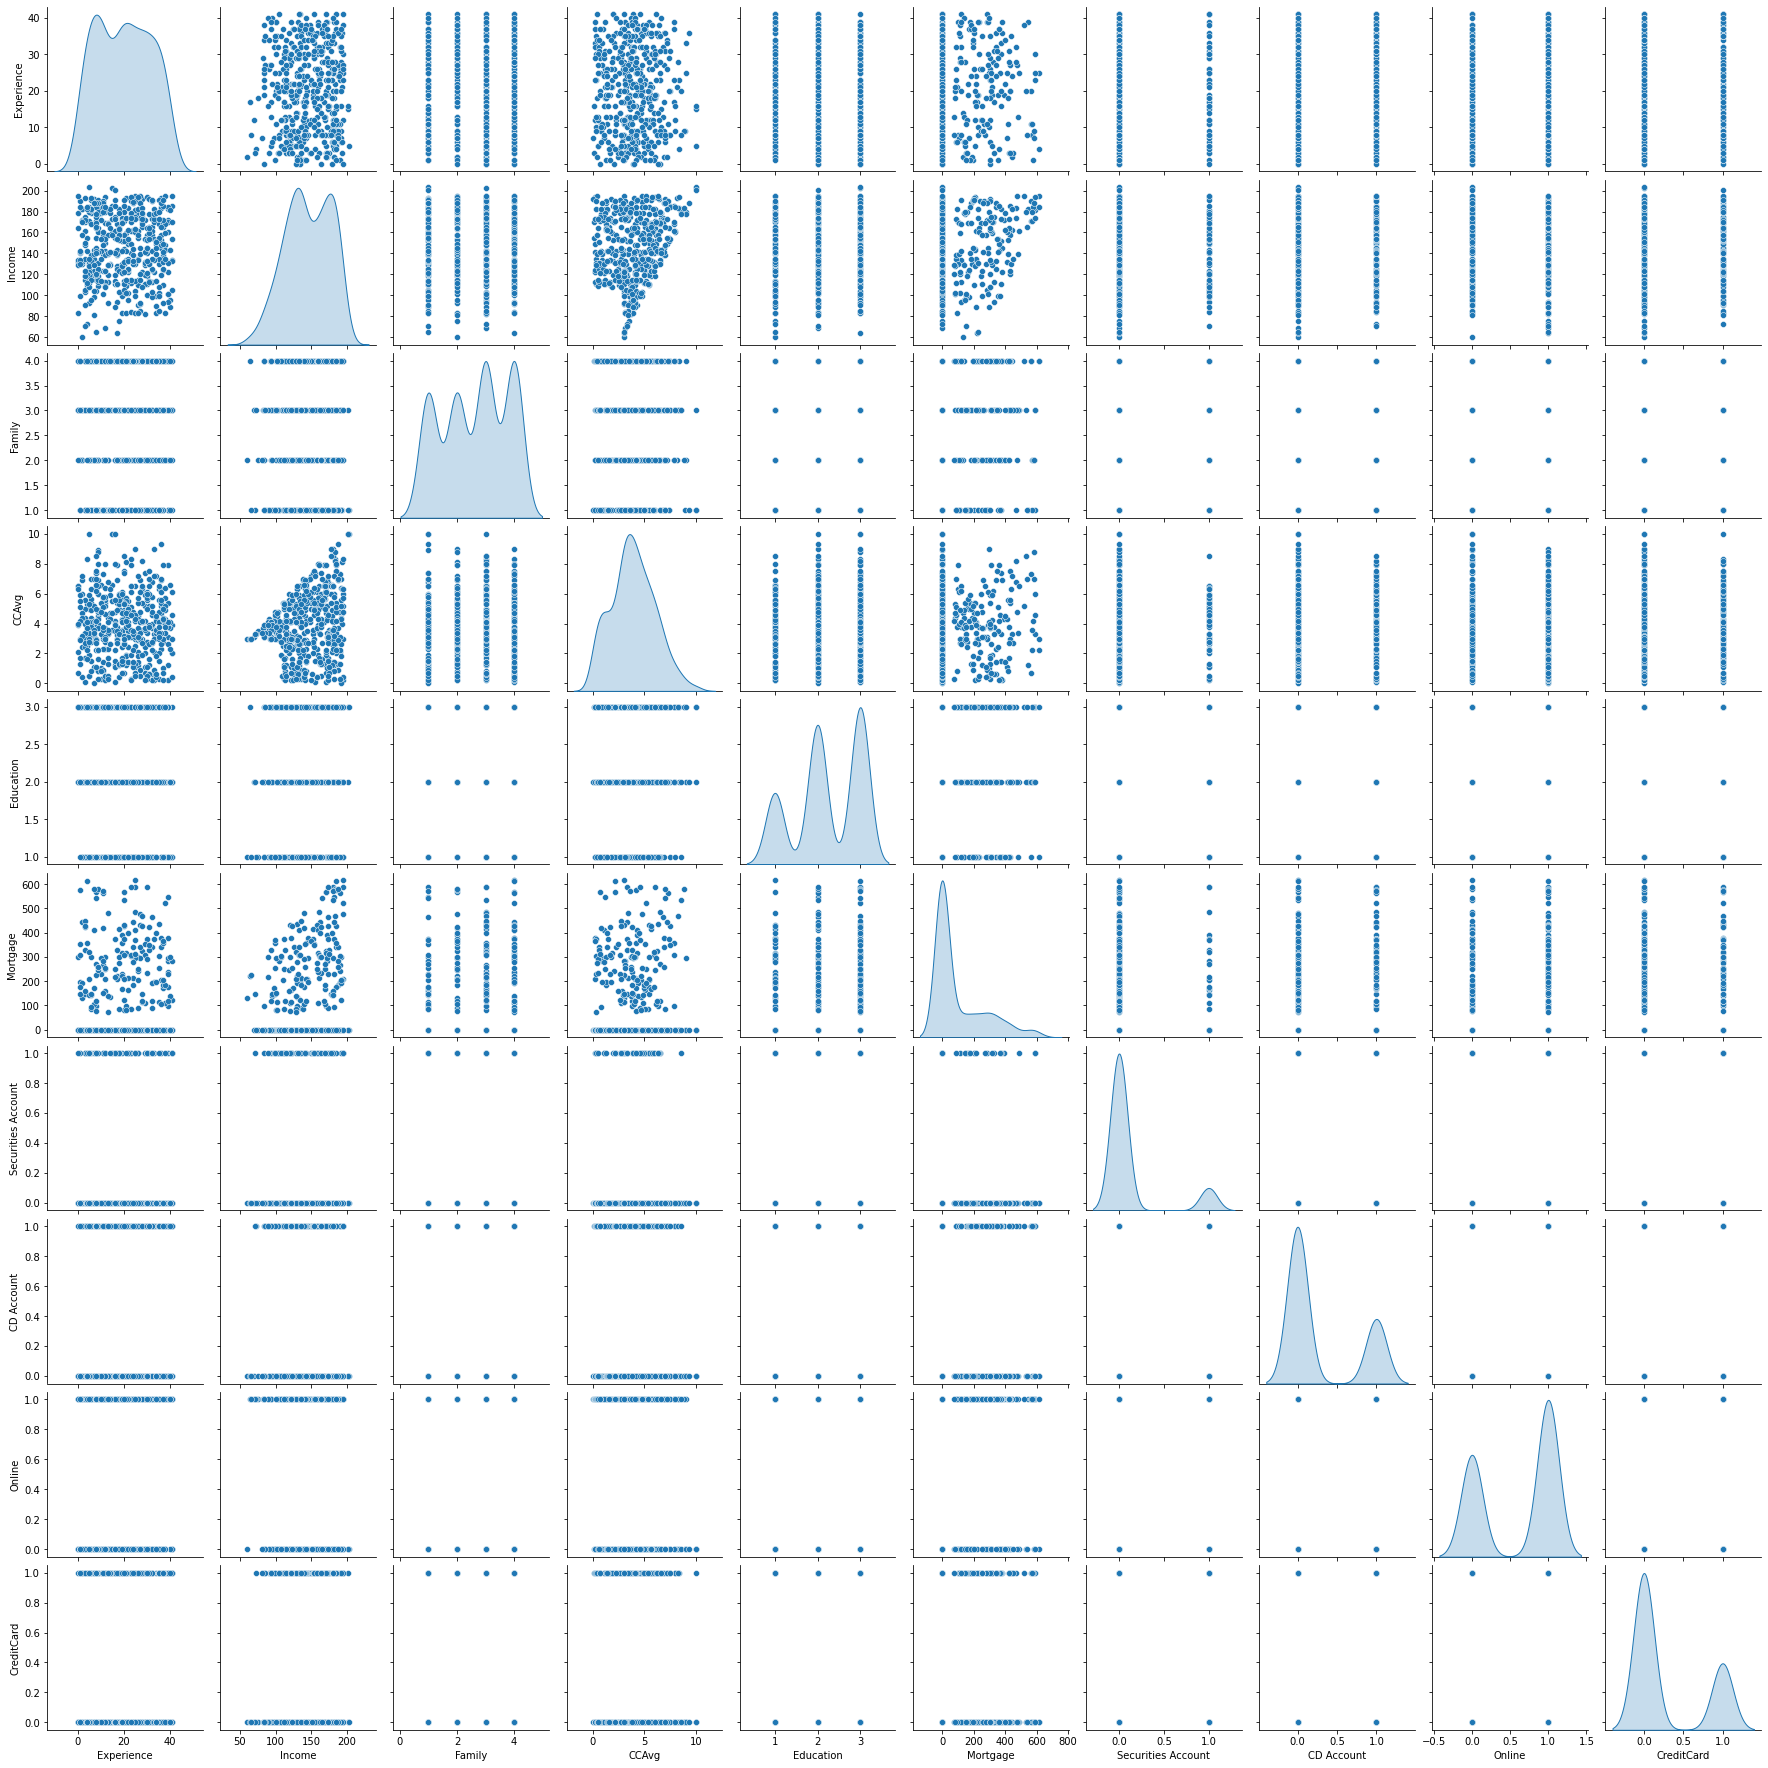

In [17]:
sns.pairplot(file[file['Personal Loan']==1].drop(['Personal Loan','Age'],axis=1),diag_kind = 'kde')

## Pairwise plot for people who didn't take Personal Loan

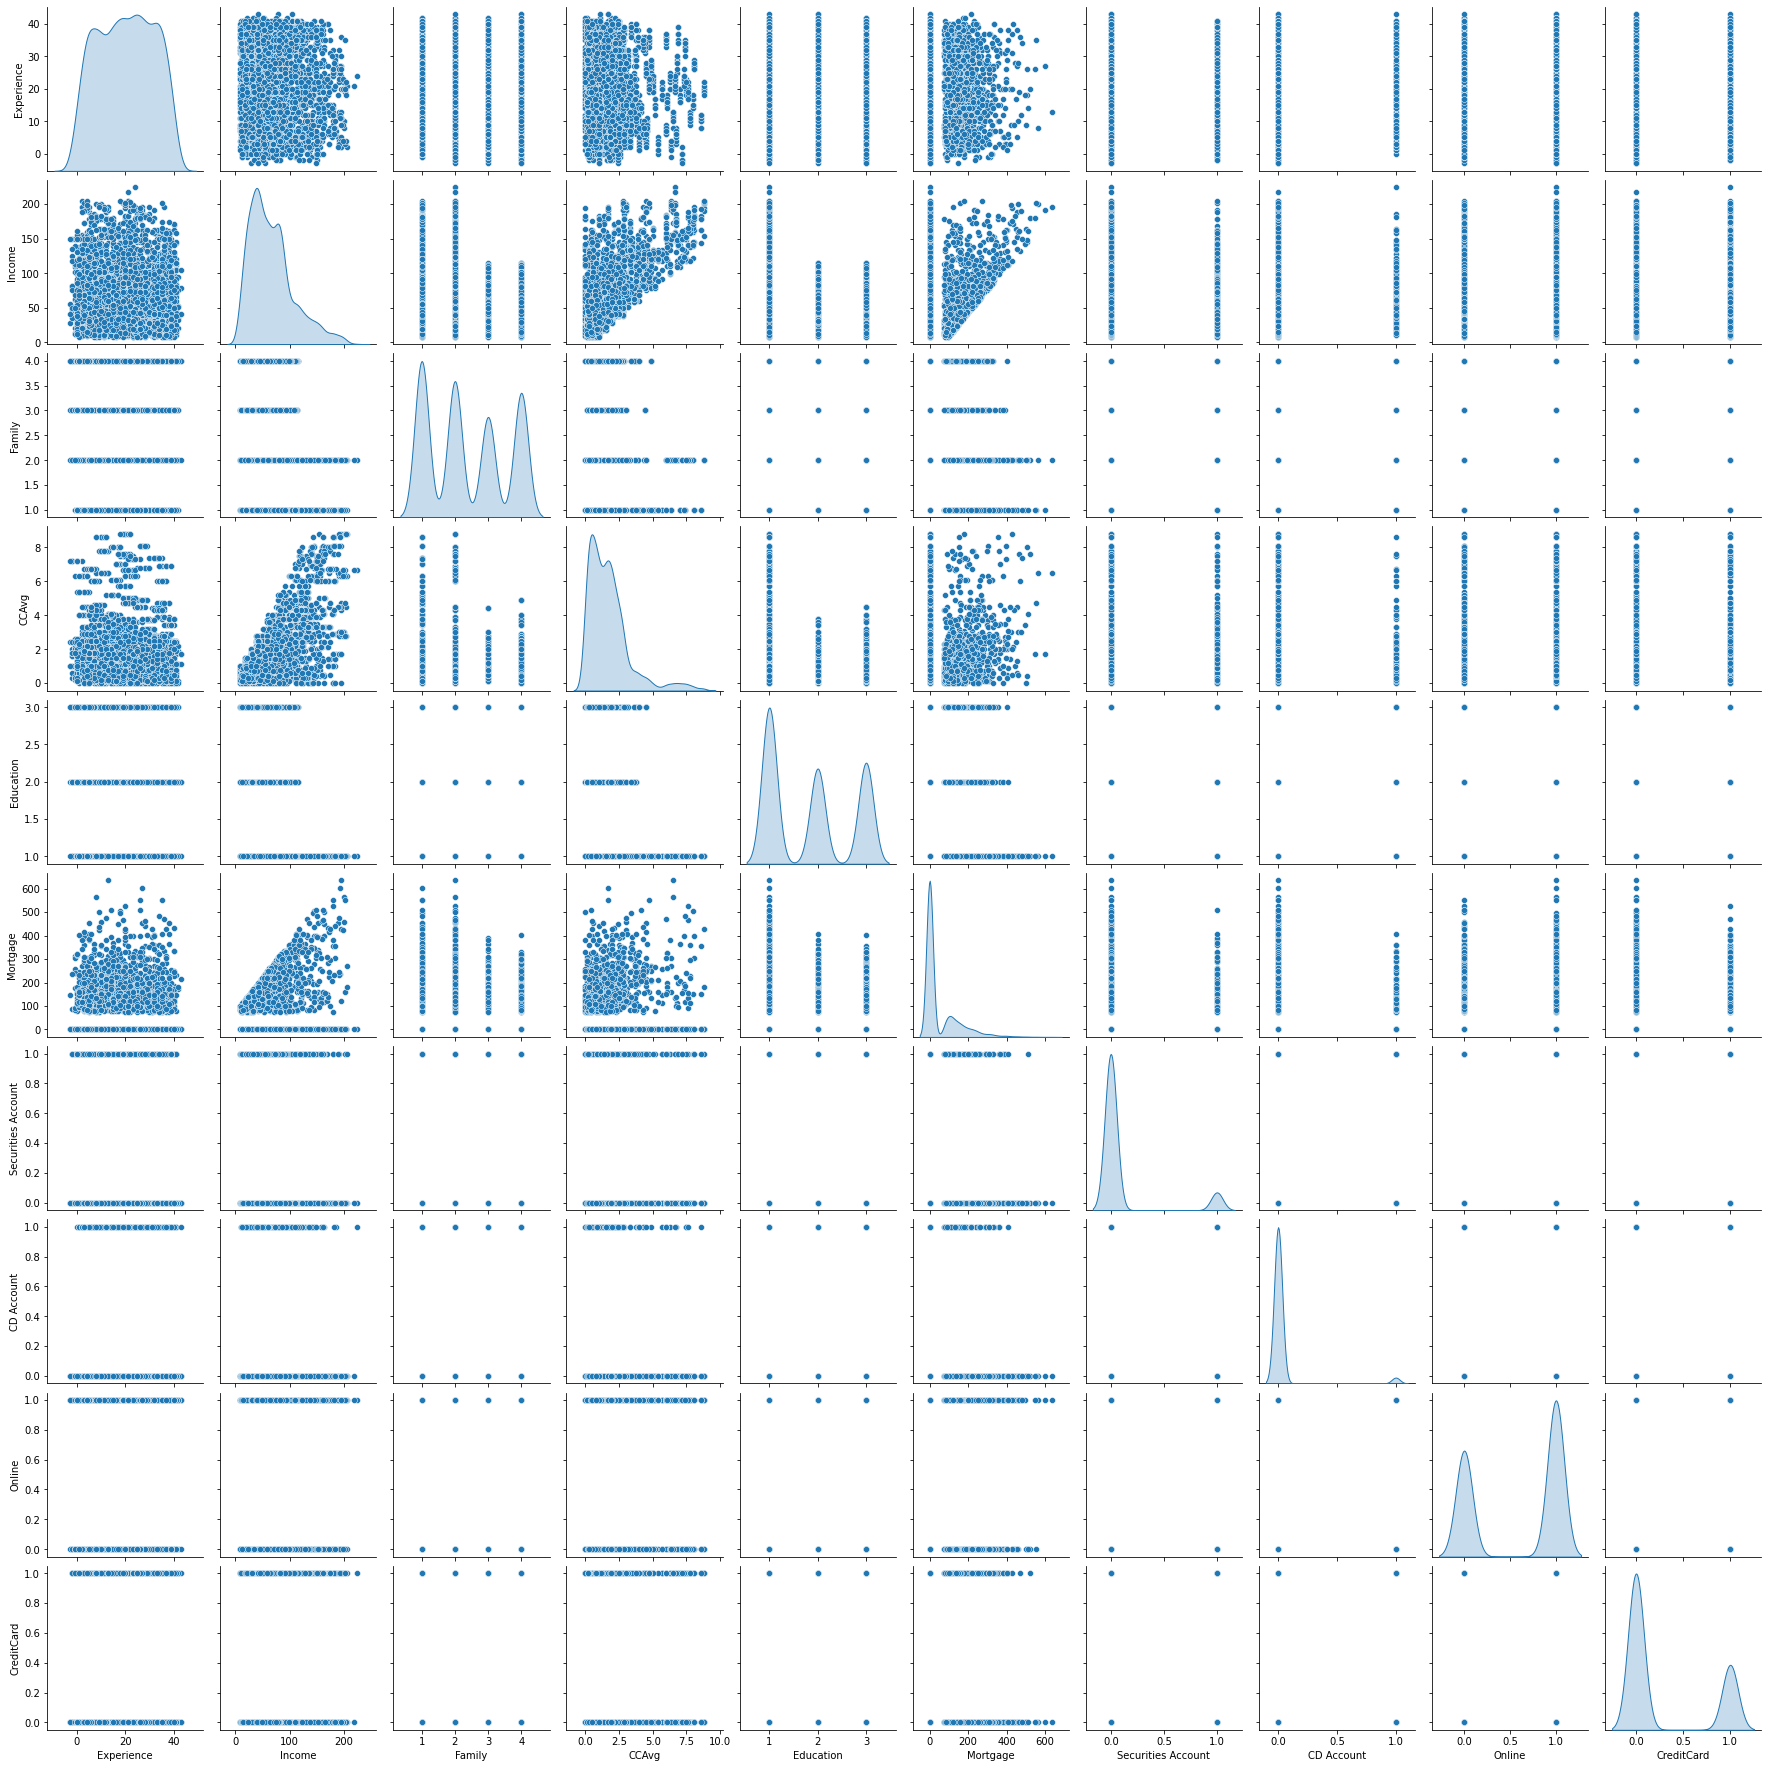

In [18]:
sns.pairplot(file[file['Personal Loan']==0].drop(['Personal Loan','Age'],axis=1),diag_kind = 'kde')

## Correlation

In [19]:
corr = file.corr()

In [20]:
corr

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.994215,-0.055269,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.994215,1.000000,-0.046574,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.055269,-0.046574,1.000000,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
Family,-0.046418,-0.052563,-0.157501,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052012,-0.050077,0.645984,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.041334,0.013152,-0.187524,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.010582,0.206806,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,-0.007413,0.502462,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.001232,-0.002616,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028
CD Account,0.008043,0.010353,0.169738,0.014110,0.136534,0.013934,0.089311,0.316355,0.317034,1.000000,0.175880,0.278644


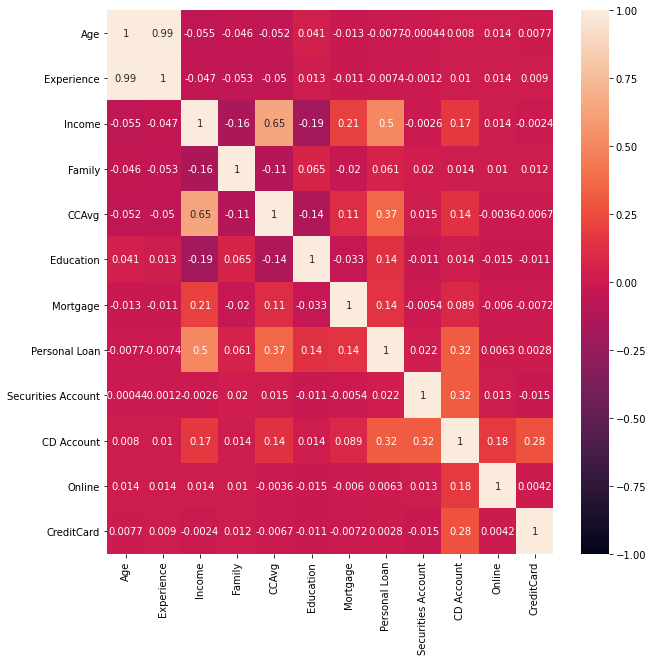

In [21]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True,vmin=-1,vmax=1);

# Analysis Inferences
We see that the Personal Loan is influenced by (not just based on heatmap but also pairwise plots)
1. Income (Strongly)
2. CCAvg (Strongly)
3. Education (Strongly)
4. Mortgage (mildly)
5. CD Account (mildly)
6. Family (mildly)

In [22]:
loans = file[file['Personal Loan']==1]['Age'].count()
noloans = file[file['Personal Loan']==0]['Age'].count()
totol = file['Age'].count()

In [23]:
print("No of loans = {}\nNo of no loans ={}\n%minority = {}%".format(loans,noloans,100*loans/totol))

No of loans = 480
No of no loans =4520
%minority = 9.6%


We observe moderate data imbalance since #minority < 10% #total<br>
We must go for downsampling or upweighting

# Upweighting data

In [24]:
file_uw = file
is_loan = file['Personal Loan'] == 1
file_add = file[is_loan]
for i in range(noloans//loans-1):
    file_uw=file_uw.append(file_add)
file_uw = file_uw.sample(frac=1).reset_index(drop=True)

In [25]:
loans_uw = file_uw[file_uw['Personal Loan']==1]['Age'].count()
noloans_uw = file_uw[file_uw['Personal Loan']==0]['Age'].count()
totol_uw = file_uw['Age'].count()

In [26]:
print("No of loans = {}\nNo of no loans ={}".format(loans_uw,noloans_uw))

No of loans = 4320
No of no loans =4520


BAM!
Now let's use this dataframe to train our model

# Training Models

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

In [66]:
from scipy.stats import zscore

## Naive Bayes

In [67]:
from sklearn.naive_bayes import GaussianNB as GNB

In [68]:
file1 = file_uw[['Income','CCAvg','Education','Mortgage','CD Account','Family','Personal Loan']]

In [69]:
X = file1.drop(['Personal Loan'],axis=1)
y = file1[['Personal Loan']]

In [70]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [71]:
gnbc = GNB()
gnbc.fit(X_train,y_train.values.ravel())

GaussianNB()

In [72]:
from sklearn import metrics

In [73]:
y_hat = gnbc.predict(X_test)

In [74]:
print(metrics.accuracy_score(y_test,y_hat))

0.8416289592760181


### mean accuracy on the given test data and labels.

#### For train data

In [75]:
gnbc.score(X_train,y_train)

0.8279128959276018

#### For test data

In [76]:
gnbc.score(X_test,y_test)

0.8416289592760181

In [77]:
print(metrics.classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       926
           1       0.88      0.78      0.82       842

    accuracy                           0.84      1768
   macro avg       0.85      0.84      0.84      1768
weighted avg       0.84      0.84      0.84      1768



<AxesSubplot:>

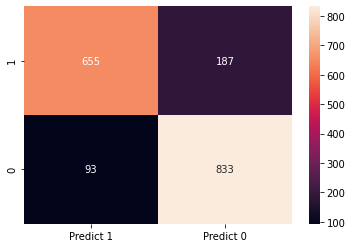

In [78]:
cm = metrics.confusion_matrix(y_test,y_hat,labels=[1,0]);
df_cm = pd.DataFrame(cm,index = [i for i in ["1","0"]],columns = [i for i in ["Predict 1","Predict 0"]])
sns.heatmap(df_cm,annot = True,fmt = 'g')

### ROC

In [79]:
y_prob = gnbc.predict_proba(X_test)[:,1]

In [80]:
y_prob

array([9.99999419e-01, 6.44880818e-05, 9.90831436e-01, ...,
       1.26050592e-04, 1.41203888e-02, 1.96111775e-04])

In [81]:
fpr, tpr, _ = roc_curve(y_test, y_prob)

In [82]:
roc_auc = auc(fpr, tpr)

In [83]:
roc_auc

0.9392837171601094

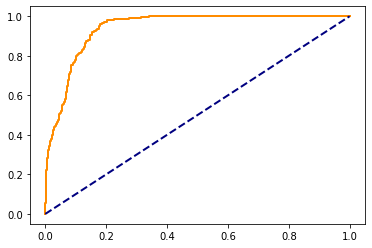

In [84]:
plt.plot(fpr, tpr, color='darkorange',lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

## Logistic Regression

In [85]:
from sklearn.linear_model import LogisticRegression

In [86]:
file2 = file1#.drop(['Pclass'],axis=1)

In [87]:
X = file2.drop(['Personal Loan'],axis=1)
y = file2[['Personal Loan']]

In [88]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [89]:
reg_model = LogisticRegression()
reg_model.fit(X_train,y_train.values.ravel())

c:\users\vanir\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### mean accuracy on the given test data and labels.

#### For train data

In [90]:
reg_model.score(X_train,y_train)

0.8955033936651584

#### For test data

In [91]:
reg_model.score(X_test,y_test)

0.9021493212669683

In [92]:
from sklearn import metrics

In [93]:
y_hat = np.where(reg_model.predict_proba(X_test)[:,1] >= 0.5, 1, 0)#reg_model.predict(X_test)

<AxesSubplot:>

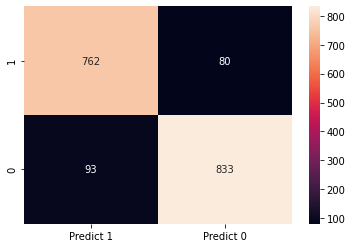

In [94]:
cm = metrics.confusion_matrix(y_test,y_hat,labels=[1,0]);
df_cm = pd.DataFrame(cm,index = [i for i in ["1","0"]],columns = [i for i in ["Predict 1","Predict 0"]])
sns.heatmap(df_cm,annot = True,fmt = 'g')

In [95]:
print(metrics.classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91       926
           1       0.89      0.90      0.90       842

    accuracy                           0.90      1768
   macro avg       0.90      0.90      0.90      1768
weighted avg       0.90      0.90      0.90      1768



### ROC

In [96]:
y_prob = reg_model.predict_proba(X_test)[:,1]

In [97]:
y_prob

array([0.9991766 , 0.00936622, 0.97472916, ..., 0.01539381, 0.0365144 ,
       0.00290868])

In [98]:
fpr, tpr, _ = roc_curve(y_test, y_prob)

In [99]:
roc_auc = auc(fpr, tpr)

In [100]:
roc_auc

0.9622799772217746

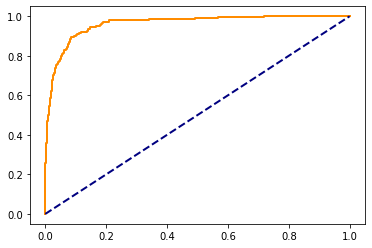

In [101]:
plt.plot(fpr, tpr, color='darkorange',lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

## Support Vector Machine

In [102]:
from sklearn import svm

### Scaling

In [104]:
Xscaled = X.apply(zscore)

In [105]:
X_train,X_test,y_train,y_test = train_test_split(Xscaled,y,test_size=0.2,random_state=1)

In [106]:
#Create a svm Classifier
clf = svm.SVC(gamma= 0.023,C=5,probability=True) # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train.values.ravel())

#Predict the response for test dataset
y_hat = clf.predict(X_test)

### Score

In [107]:
print("Training score\t:",clf.score(X_train,y_train))
print("Test score\t:",clf.score(X_test,y_test))

Training score	: 0.9557409502262444
Test score	: 0.9621040723981901


In [108]:
print(metrics.accuracy_score(y_test,y_hat))

0.9621040723981901


### mean accuracy on the given test data and labels.

In [109]:
print(metrics.classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       926
           1       0.96      0.96      0.96       842

    accuracy                           0.96      1768
   macro avg       0.96      0.96      0.96      1768
weighted avg       0.96      0.96      0.96      1768



<AxesSubplot:>

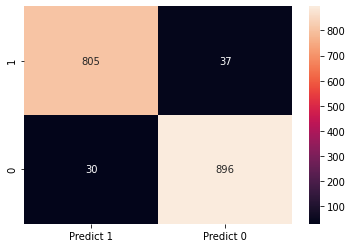

In [110]:
cm = metrics.confusion_matrix(y_test,y_hat,labels=[1,0]);
df_cm = pd.DataFrame(cm,index = [i for i in ["1","0"]],columns = [i for i in ["Predict 1","Predict 0"]])
sns.heatmap(df_cm,annot = True,fmt = 'g')

### ROC

In [111]:
y_prob = clf.predict_proba(X_test)[:,1]

In [112]:
y_prob

array([9.99999994e-01, 5.17897284e-06, 9.99999957e-01, ...,
       1.79816329e-06, 3.93269206e-02, 3.73907080e-03])

In [113]:
fpr, tpr, _ = roc_curve(y_test, y_prob)

In [114]:
roc_auc = auc(fpr, tpr)

In [115]:
roc_auc

0.9909111546610713

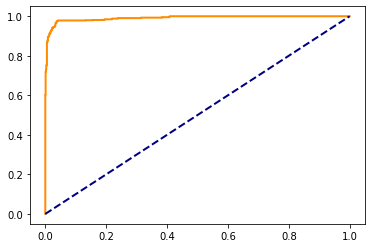

In [116]:
plt.plot(fpr, tpr, color='darkorange',lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

## K Nearest Neighbours

In [117]:
from sklearn.neighbors import KNeighborsClassifier as KNC

### Scaling

In [118]:
Xscaled = X.apply(zscore)

In [119]:
X_train,X_test,y_train,y_test = train_test_split(Xscaled,y,test_size=0.2,random_state=1)

In [120]:
knc = KNC(n_neighbors= 9)
knc.fit(X_train,y_train.values.ravel())

KNeighborsClassifier(n_neighbors=9)

In [121]:
y_hat = knc.predict(X_test)

### Score

In [122]:
print("Training score\t:",knc.score(X_train,y_train))
print("Test score\t:",knc.score(X_test,y_test))

Training score	: 0.9811934389140271
Test score	: 0.9762443438914027


In [123]:
print(metrics.accuracy_score(y_test,y_hat))

0.9762443438914027


### mean accuracy on the given test data and labels.

In [124]:
print(metrics.classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       926
           1       0.96      0.99      0.98       842

    accuracy                           0.98      1768
   macro avg       0.98      0.98      0.98      1768
weighted avg       0.98      0.98      0.98      1768



<AxesSubplot:>

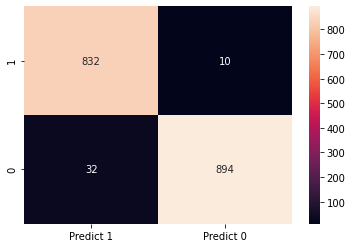

In [125]:
cm = metrics.confusion_matrix(y_test,y_hat,labels=[1,0]);
df_cm = pd.DataFrame(cm,index = [i for i in ["1","0"]],columns = [i for i in ["Predict 1","Predict 0"]])
sns.heatmap(df_cm,annot = True,fmt = 'g')

### ROC

In [126]:
y_prob = knc.predict_proba(X_test)[:,1]

In [127]:
y_prob

array([1.        , 0.        , 1.        , ..., 0.        , 0.88888889,
       0.        ])

In [128]:
fpr, tpr, _ = roc_curve(y_test, y_prob)

In [129]:
roc_auc = auc(fpr, tpr)

In [130]:
roc_auc

0.9972841840111223

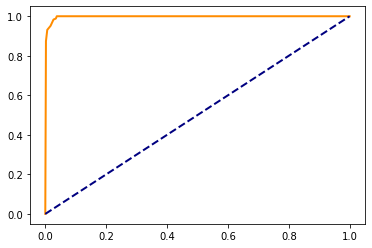

In [131]:
plt.plot(fpr, tpr, color='darkorange',lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

## Decision Tree

In [418]:
from sklearn.tree import DecisionTreeClassifier as DSC

In [419]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

## Without Pruning

In [422]:
dTree = DSC(criterion="gini",random_state=1)

In [423]:
dTree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

### Score

In [424]:
print("Training score\t:",dTree.score(X_train,y_train))
print("Test score\t:",dTree.score(X_test,y_test))

Training score	: 1.0
Test score	: 0.998868778280543


### Confusion Matrix

In [425]:
y_hat = dTree.predict(X_test)

In [426]:
print(metrics.classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       926
           1       1.00      1.00      1.00       842

    accuracy                           1.00      1768
   macro avg       1.00      1.00      1.00      1768
weighted avg       1.00      1.00      1.00      1768



<AxesSubplot:>

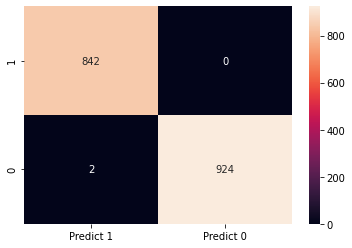

In [427]:
cm = metrics.confusion_matrix(y_test,y_hat,labels=[1,0]);
df_cm = pd.DataFrame(cm,index = [i for i in ["1","0"]],columns = [i for i in ["Predict 1","Predict 0"]])
sns.heatmap(df_cm,annot = True,fmt = 'g')

### ROC

In [428]:
y_prob = dTree.predict_proba(X_test)[:,1]

In [429]:
y_prob.shape

(1768,)

In [430]:
fpr, tpr, _ = roc_curve(y_test, y_prob)

In [431]:
roc_auc = auc(fpr, tpr)

In [432]:
roc_auc

0.9989200863930885

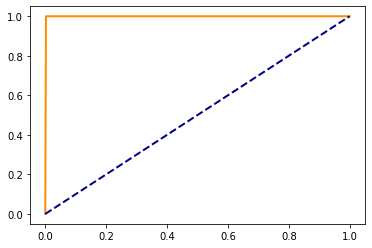

In [433]:
plt.plot(fpr, tpr, color='darkorange',lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

## Regularized (Pruned)

In [146]:
dTreeR = DSC(criterion="gini",max_depth=13,random_state=1)

In [147]:
dTreeR.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=13, random_state=1)

### Score

In [148]:
print("Training score\t:",dTreeR.score(X_train,y_train))
print("Test score\t:",dTreeR.score(X_test,y_test))

Training score	: 0.9998585972850679
Test score	: 0.9983031674208145


### Confusion Matrix

In [149]:
y_hat = dTreeR.predict(X_test)

In [150]:
print(metrics.classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       926
           1       1.00      1.00      1.00       842

    accuracy                           1.00      1768
   macro avg       1.00      1.00      1.00      1768
weighted avg       1.00      1.00      1.00      1768



<AxesSubplot:>

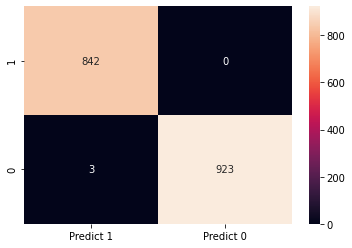

In [151]:
cm = metrics.confusion_matrix(y_test,y_hat,labels=[1,0]);
df_cm = pd.DataFrame(cm,index = [i for i in ["1","0"]],columns = [i for i in ["Predict 1","Predict 0"]])
sns.heatmap(df_cm,annot = True,fmt = 'g')

### ROC

In [152]:
y_prob = dTreeR.predict_proba(X_test)[:,1]

In [153]:
y_prob.shape

(1768,)

In [154]:
fpr, tpr, _ = roc_curve(y_test, y_prob)

In [155]:
roc_auc = auc(fpr, tpr)

In [156]:
roc_auc

0.9983743580798572

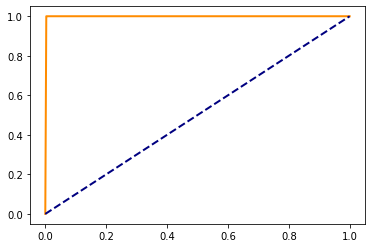

In [157]:
plt.plot(fpr, tpr, color='darkorange',lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

## Bagging

In [434]:
from sklearn.ensemble import BaggingClassifier as BC

In [435]:
bgcl = BC(n_estimators=50,base_estimator = DSC(criterion="entropy",max_depth=20,random_state=1),random_state=1)

In [436]:
bgcl.fit(X_train,y_train.values.ravel())

BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        max_depth=20,
                                                        random_state=1),
                  n_estimators=50, random_state=1)

### Score

In [437]:
print("Training score\t:",bgcl.score(X_train,y_train))
print("Test score\t:",bgcl.score(X_test,y_test))

Training score	: 1.0
Test score	: 0.997737556561086


### Confusion Matrix

In [439]:
y_hat = bgcl.predict(X_test)

In [440]:
print(metrics.classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       926
           1       1.00      1.00      1.00       842

    accuracy                           1.00      1768
   macro avg       1.00      1.00      1.00      1768
weighted avg       1.00      1.00      1.00      1768



<AxesSubplot:>

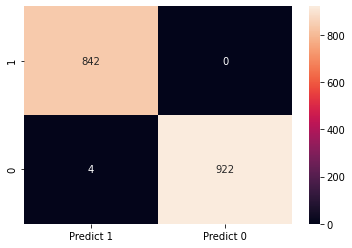

In [441]:
cm = metrics.confusion_matrix(y_test,y_hat,labels=[1,0]);
df_cm = pd.DataFrame(cm,index = [i for i in ["1","0"]],columns = [i for i in ["Predict 1","Predict 0"]])
sns.heatmap(df_cm,annot = True,fmt = 'g')

### ROC

In [466]:
y_prob = bgcl.predict_proba(X_test)[:,1]

In [467]:
(y_prob)

array([1., 0., 1., ..., 0., 1., 0.])

In [468]:
fpr, tpr, _ = roc_curve(y_test, y_prob)

In [469]:
roc_auc = auc(fpr, tpr)

In [470]:
roc_auc

1.0

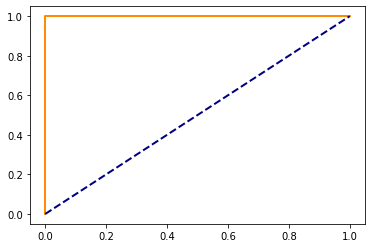

In [471]:
plt.plot(fpr, tpr, color='darkorange',lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

## ADABoosting

In [373]:
from sklearn.ensemble import AdaBoostClassifier as ABC

In [374]:
abcl = ABC(n_estimators=50,base_estimator = DSC(criterion="entropy",max_depth=20,random_state=1),random_state=1)

In [375]:
abcl.fit(X_train,y_train.values.ravel())

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                         max_depth=20,
                                                         random_state=1),
                   random_state=1)

### Score

In [376]:
print("Training score\t:",abcl.score(X_train,y_train))
print("Test score\t:",abcl.score(X_test,y_test))

Training score	: 1.0
Test score	: 0.9971719457013575


### Confusion Matrix

In [377]:
y_hat = abcl.predict(X_test)

In [378]:
print(metrics.classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       926
           1       0.99      1.00      1.00       842

    accuracy                           1.00      1768
   macro avg       1.00      1.00      1.00      1768
weighted avg       1.00      1.00      1.00      1768



<AxesSubplot:>

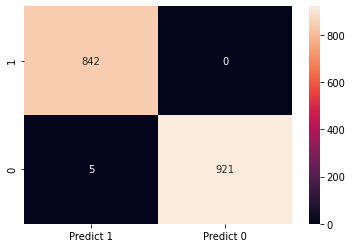

In [379]:
cm = metrics.confusion_matrix(y_test,y_hat,labels=[1,0]);
df_cm = pd.DataFrame(cm,index = [i for i in ["1","0"]],columns = [i for i in ["Predict 1","Predict 0"]])
sns.heatmap(df_cm,annot = True,fmt = 'g')

### ROC

In [380]:
y_prob = abcl.predict_proba(X_test)[:,1]

In [381]:
y_prob.shape

(1768,)

In [382]:
fpr, tpr, _ = roc_curve(y_test, y_prob)

In [383]:
roc_auc = auc(fpr, tpr)

In [384]:
roc_auc

0.9973002159827214

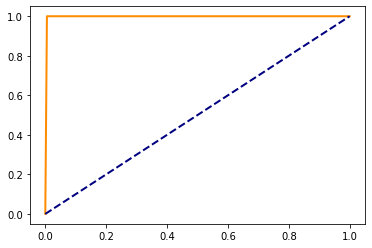

In [385]:
plt.plot(fpr, tpr, color='darkorange',lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Random Forest

In [392]:
from sklearn.ensemble import RandomForestClassifier as RFC

In [393]:
rfcl = RFC(n_estimators=100,max_depth=5,max_features = 5,random_state=1)

In [394]:
rfcl.fit(X_train,y_train.values.ravel())

RandomForestClassifier(max_depth=5, max_features=5, random_state=1)

### Score

In [395]:
print("Training score\t:",rfcl.score(X_train,y_train))
print("Test score\t:",rfcl.score(X_test,y_test))

Training score	: 0.982183257918552
Test score	: 0.9864253393665159


### Confusion Matrix

In [396]:
y_hat = rfcl.predict(X_test)

In [397]:
print(metrics.classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       926
           1       0.98      1.00      0.99       842

    accuracy                           0.99      1768
   macro avg       0.99      0.99      0.99      1768
weighted avg       0.99      0.99      0.99      1768



<AxesSubplot:>

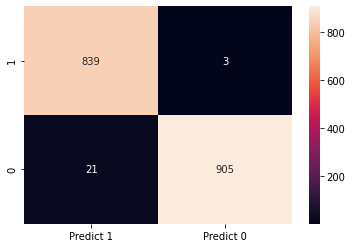

In [398]:
cm = metrics.confusion_matrix(y_test,y_hat,labels=[1,0]);
df_cm = pd.DataFrame(cm,index = [i for i in ["1","0"]],columns = [i for i in ["Predict 1","Predict 0"]])
sns.heatmap(df_cm,annot = True,fmt = 'g')

### ROC

In [399]:
y_prob = rfcl.predict_proba(X_test)[:,1]

In [400]:
y_prob.shape

(1768,)

In [401]:
fpr, tpr, _ = roc_curve(y_test, y_prob)

In [402]:
roc_auc = auc(fpr, tpr)

In [403]:
roc_auc

0.9987251376184443

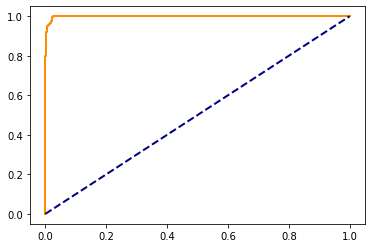

In [404]:
plt.plot(fpr, tpr, color='darkorange',lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Gradient Boosting

In [405]:
from sklearn.ensemble import GradientBoostingClassifier as GBC

In [406]:
gbcl = GBC(n_estimators=50,max_depth=15, max_features=6,random_state=1)

In [407]:
gbcl.fit(X_train,y_train.values.ravel())

GradientBoostingClassifier(max_depth=15, max_features=6, n_estimators=50,
                           random_state=1)

### Score

In [408]:
print("Training score\t:",gbcl.score(X_train,y_train))
print("Test score\t:",gbcl.score(X_test,y_test))

Training score	: 1.0
Test score	: 0.9971719457013575


### Confusion Matrix

In [409]:
y_hat = gbcl.predict(X_test)

In [410]:
print(metrics.classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       926
           1       0.99      1.00      1.00       842

    accuracy                           1.00      1768
   macro avg       1.00      1.00      1.00      1768
weighted avg       1.00      1.00      1.00      1768



<AxesSubplot:>

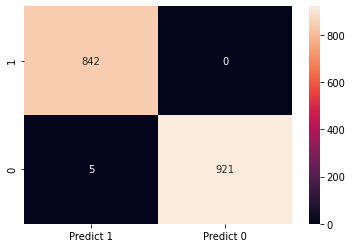

In [411]:
cm = metrics.confusion_matrix(y_test,y_hat,labels=[1,0]);
df_cm = pd.DataFrame(cm,index = [i for i in ["1","0"]],columns = [i for i in ["Predict 1","Predict 0"]])
sns.heatmap(df_cm,annot = True,fmt = 'g')

### ROC

In [412]:
y_prob = gbcl.predict_proba(X_test)[:,1]

In [413]:
y_prob.shape

(1768,)

In [414]:
fpr, tpr, _ = roc_curve(y_test, y_prob)

In [415]:
roc_auc = auc(fpr, tpr)

In [416]:
roc_auc

0.9989200863930886

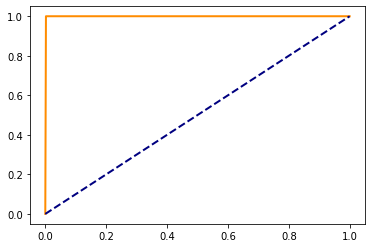

In [417]:
plt.plot(fpr, tpr, color='darkorange',lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Conclusion
The following algorithms have given ultimate performace for the given data after scaling and upweighting with test and train accuracies greater than 99.7%<br>
1. Decision Tree (Unpruned)
2. Decision Tree (Pruned)
3. Bagging
4. Gradient Boosing
5. Adaboosting


It is interesting to note that none of the aforementioned models has mispredicted false negatives.